In [1]:
import numpy as np
import pandas as pd

# Motivations
On top of the similarity measures that we've been exploring in terms of co-occurrences and likelihood ratios, there may be some interest to look at longer term dependencies in conversation traces. These longer term dependencies can also be documented via frequency and compared, but determining the validity of a longer sequence in a robust manner is challenging.

We consider first simple notions of logical statements that pattern match longer sequences, and eventually look at logics such as LTL and variations of such in order to specify these longer sequence concepts, which we call "sub-conversations."

In [2]:
sequence = "abbabbabbabbaccbabacbabcbcbcbabacbcbcbcbababcdcbcbabaacbcbcbacbacbabcabcbbcbcababcabcabcbacbabcababcbacbcbacbabcbcbacbbcccabcabcbacbcbabcbcabcbcabccacdbabbcabcbacba"
a = [x for x in sequence]
len(a)

164

In [3]:
#for this 162 sequence, let's find the long sequence "abba" like we would find a 4-gram
def match_pattern(trace, pat):
    
    assert type(pat) == list
    assert type(trace) == list
    
    loc = {}
    freq = {}
    
    for item in pat:
        for i in range(len(trace)-len(item)):
            if "".join(trace[i:i+len(item)]) == item:
                try:
                    loc["{0}".format(item)][i] = 1
                    freq["{0}".format(item)] += 1
                except:
                    loc["{0}".format(item)] = np.zeros((len(trace),))
                    freq["{0}".format(item)] = 1
    
    return loc, freq

In [4]:
l1, f1 = match_pattern(a, ["abba","ac"])

In [5]:
l1

{'abba': array([0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'ac': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 

In [6]:
f1

{'abba': 4, 'ac': 13}

In [7]:
#helper function to count the occurrences of violations to the label
def count_label (sub, labels):
    assert type(sub) == list
    assert type(labels) == list
    
    count = 0
    for item in sub:
        if item not in labels:
            count += 1
    return count

In [8]:
#define a find all instances of "x until y"
def until (trace, x, y):
    
    assert type(trace) == list
    assert type(x) == list
    assert type(y) == list
    
    #find all instances of until
    s = -1
    e = -1
    sol = []
    
    for pos in range(len(trace)):
        
        if trace[pos] in x and s == -1:
            s = pos
        
        if trace[pos] in y and s != -1:
            e = pos
            sol.append((s,e))
            s = -1
            e = -1

    return sol


In [9]:
until(a, ["a", "b"],["d"])

[(0, 45), (47, 150)]

In [10]:
#re-define until N function
def until_N (trace, x, y, N):
    
    assert type(trace) == list
    assert type(x) == list
    assert type(y) == list
    
    sol = []
    current = N
    s = -1
    e = -1
    for i in range(len(trace)):
        
        if (trace[i] in x) and e == -1 and s == -1: #finding first instance of x
            s = i
        
        if (s != -1) and (trace[i] not in x) and (trace[i] not in y): #started count and violates Until
            
            if current <= 0: #no more N to give
                s = -1
                e = -1
                current = N
                continue #search for next
                
            else: #more N to give, decrement
                current -= 1
        
        if s != -1 and (trace[i] in y): #found instance of y and x
            e = i
            sol.append((s,e, count_label(trace[s:e],x), e-s)) #append starting and ending index, with number of appearances of x
            s = -1
            e = -1
    
    return sol

In [11]:
print(until_N(a, ["a"], ["d"], 100))
print(a[0:40])

[(0, 45, 33, 45), (144, 150, 4, 6)]
['a', 'b', 'b', 'a', 'b', 'b', 'a', 'b', 'b', 'a', 'b', 'b', 'a', 'c', 'c', 'b', 'a', 'b', 'a', 'c', 'b', 'a', 'b', 'c', 'b', 'c', 'b', 'c', 'b', 'a', 'b', 'a', 'c', 'b', 'c', 'b', 'c', 'b', 'c', 'b']


In [12]:
#data
dat1 = pd.read_csv('./graham.norton.s22.e08_data.csv')
dat2 = pd.read_csv('./graham.norton.s22.e12_data.csv')
dat3 = pd.read_csv('./blackpink_data.csv')
test1 = list(dat1.L)
test2 = list(dat2.L)
test3 = list(dat3.L)

In [13]:
#try Recall.From.Memory
until_N(test3, ["recall"],["respond.agree", "respond.deny"], 1000)

[(10, 30, 16, 20),
 (37, 45, 3, 8),
 (51, 70, 16, 19),
 (80, 200, 115, 120),
 (204, 209, 2, 5),
 (230, 325, 72, 95),
 (332, 352, 12, 20),
 (353, 366, 9, 13),
 (367, 413, 33, 46),
 (417, 440, 8, 23),
 (472, 531, 26, 59),
 (533, 551, 10, 18),
 (555, 558, 2, 3),
 (565, 715, 91, 150),
 (722, 729, 5, 7),
 (731, 814, 60, 83),
 (820, 833, 12, 13),
 (834, 872, 35, 38),
 (880, 920, 33, 40),
 (922, 940, 14, 18),
 (941, 965, 20, 24),
 (971, 996, 21, 25),
 (1001, 1015, 11, 14),
 (1058, 1152, 89, 94),
 (1176, 1239, 60, 63),
 (1261, 1271, 8, 10),
 (1277, 1284, 3, 7)]

In [14]:
#try Give.Monologue
until_N(test3, ["give.statement", "give.opinion"], ["respond.agree","respond.deny"], 1000)

[(25, 30, 3, 5),
 (32, 35, 0, 3),
 (36, 45, 6, 9),
 (48, 70, 14, 22),
 (72, 200, 57, 128),
 (202, 209, 3, 7),
 (210, 325, 50, 115),
 (329, 352, 13, 23),
 (357, 366, 6, 9),
 (372, 413, 23, 41),
 (414, 440, 18, 26),
 (443, 531, 50, 88),
 (535, 551, 6, 16),
 (554, 558, 2, 4),
 (563, 715, 69, 152),
 (720, 729, 3, 9),
 (730, 814, 54, 84),
 (817, 833, 9, 16),
 (836, 872, 14, 36),
 (875, 876, 0, 1),
 (877, 920, 18, 43),
 (921, 940, 9, 19),
 (943, 965, 6, 22),
 (968, 996, 15, 28),
 (997, 1015, 3, 18),
 (1016, 1027, 1, 11),
 (1030, 1037, 1, 7),
 (1038, 1152, 36, 114),
 (1153, 1239, 28, 86),
 (1240, 1247, 1, 7),
 (1255, 1271, 9, 16),
 (1272, 1274, 1, 2),
 (1280, 1284, 3, 4),
 (1287, 1292, 2, 5)]

In [15]:
def define_symbols (traces):
    assert type(traces) == list
    symbols = []
    for item in traces:
        symbols.append(set(item))
    x = symbols[0]
    for i in range(len(symbols)):
        x = x.union(symbols[i])
    
    return list(x)

In [23]:
#do some combinations, searching for the best properties for until-N statements
labels = define_symbols([test3])
labels = [x for x in labels if( x != "misc" and x !="x") ]

#vals store
len_store = []

#strict one label -> one label definition
for i in range(len(labels)):
    for j in range(len(labels)):
        if i != j:
            print("label {0} -> {1}".format(labels[i], labels[j]))
            #print(until_N(test3, [labels[i]], [labels[j]], 1000))
            candidates = until_N(test3, [labels[i]], [labels[j]], 1000)
            for item in candidates:
                if item[3] > 10 and item [3] < 30 and item[2] < item[3]*0.40:
                    print(item)
                    len_store.append(item[3])
            print("--")

#average length
print(np.mean(len_store))

label give.statement -> respond.deny
--
label give.statement -> closed.question
--
label give.statement -> recall
--
label give.statement -> give.opinion
(155, 166, 2, 11)
--
label give.statement -> respond.agree
--
label give.statement -> use.social.convention
--
label give.statement -> open.question
--
label give.statement -> relax.atmosphere
--
label give.statement -> deflection
--
label respond.deny -> give.statement
--
label respond.deny -> closed.question
--
label respond.deny -> recall
--
label respond.deny -> give.opinion
--
label respond.deny -> respond.agree
--
label respond.deny -> use.social.convention
--
label respond.deny -> open.question
--
label respond.deny -> relax.atmosphere
--
label respond.deny -> deflection
--
label closed.question -> give.statement
--
label closed.question -> respond.deny
--
label closed.question -> recall
--
label closed.question -> give.opinion
--
label closed.question -> respond.agree
--
label closed.question -> use.social.convention
--
label 

# Properties to look for

There are some considerations for properties that we might want to look for. Note that we'll have to experiment and so we might have to come back here and change some of these assumptions after correlating with the results in the other sheet!

- First, we want the sequences to have lengths somewhere between 10 and 50(?).
- Secondly, we want the count for the violations of N to be less than half of the length of the sequence.

After observing these properties, there should be a number of label set-ups that generate a handful of these sequences, which we will then consider the label set-up as a sub-conversation. We should then note the frequency at which these sequences occur under the same label set-up, as the frequency of the sub-conversation.

For the next step, we will write the function to look for the sequences in a trace that meet the criteria of the good properties, count their frequencies, and return as results

In [33]:
#define the function to find all relevant sub-conversations in a trace
def find_sub_conversations (trace, labels, c_cap, l):
    assert type(trace) == list
    assert type(labels) == list
    assert type(c_cap) == float
    assert type(l) == int
    
    #counts
    sub_convos = {}
    
    #cycle through label pairs
    for i in range(len(labels)):
        for j in range(len(labels)):
            
            if i != j: #no repeats
                candidate = until_N(trace, [labels[i]], [labels[j]], 50) #cap at 50
                
                for item in candidate:
                    if item[3] > 10 and item [3] < l and item[2] < item[3]*c_cap:
                        try:
                            sub_convos["{0} -> {1}".format(labels[i], labels[j])] += 1
                        except:
                            sub_convos["{0} -> {1}".format(labels[i], labels[j])] = 1
    
    return sub_convos

In [34]:
find_sub_conversations(test3, labels, 0.4, 30)

{'give.statement -> give.opinion': 1,
 'give.statement -> open.question': 1,
 'recall -> give.statement': 3,
 'recall -> closed.question': 1,
 'recall -> give.opinion': 2,
 'recall -> respond.agree': 2,
 'recall -> use.social.convention': 1,
 'recall -> relax.atmosphere': 2,
 'give.opinion -> give.statement': 10,
 'give.opinion -> closed.question': 1,
 'give.opinion -> recall': 9,
 'give.opinion -> respond.agree': 2,
 'give.opinion -> use.social.convention': 7,
 'give.opinion -> open.question': 3,
 'give.opinion -> relax.atmosphere': 6}

In [29]:
find_sub_conversations(test1, labels, 0.4, 30)

{'give.statement -> closed.question': 1,
 'give.statement -> give.opinion': 2,
 'give.statement -> respond.agree': 1,
 'give.statement -> relax.atmosphere': 2,
 'recall -> give.statement': 3,
 'recall -> closed.question': 2,
 'recall -> give.opinion': 1,
 'recall -> respond.agree': 1,
 'recall -> use.social.convention': 2,
 'recall -> relax.atmosphere': 3,
 'give.opinion -> closed.question': 4,
 'give.opinion -> respond.agree': 2,
 'give.opinion -> open.question': 2,
 'give.opinion -> relax.atmosphere': 2,
 'use.social.convention -> give.statement': 3,
 'use.social.convention -> closed.question': 1,
 'use.social.convention -> give.opinion': 3,
 'use.social.convention -> respond.agree': 1,
 'use.social.convention -> relax.atmosphere': 3,
 'relax.atmosphere -> closed.question': 1}

In [30]:
find_sub_conversations(test2, labels, 0.4, 30)

{'give.statement -> give.opinion': 2,
 'give.statement -> respond.agree': 2,
 'give.statement -> use.social.convention': 1,
 'give.statement -> relax.atmosphere': 2,
 'recall -> give.statement': 3,
 'recall -> closed.question': 2,
 'recall -> give.opinion': 2,
 'recall -> respond.agree': 4,
 'recall -> use.social.convention': 3,
 'recall -> relax.atmosphere': 2,
 'use.social.convention -> give.statement': 1,
 'use.social.convention -> closed.question': 1,
 'use.social.convention -> recall': 1,
 'use.social.convention -> give.opinion': 2,
 'use.social.convention -> respond.agree': 1,
 'use.social.convention -> relax.atmosphere': 1}

# We modify the above function to do a modified-hamming distance calculation

In [64]:
#modify the function to find all relevant sub-conversations in a trace
def compare_sub_conversations (trace1, trace2, labels, c_cap, l):
    assert type(trace1) == list
    assert type(trace2) == list
    assert type(labels) == list
    assert type(c_cap) == float
    assert type(l) == int
    
    #counts
    sub_convos1 = {}
    sub_convos2 = {}
    
    #cycle through label pairs
    for i in range(len(labels)):
        for j in range(len(labels)):
            
            if i != j: #no repeats
                candidate = until_N(trace1, [labels[i]], [labels[j]], 50)
                sub_convos1["{0} -> {1}".format(labels[i], labels[j])] = 0
                
                for item in candidate:
                    if item[3] > 10 and item [3] < l and item[2] < item[3]*c_cap:
                        sub_convos1["{0} -> {1}".format(labels[i], labels[j])] += 1
    
    #do for second trace
    for i in range(len(labels)):
        for j in range(len(labels)):

            if i != j: #no repeats
                candidate = until_N(trace2, [labels[i]], [labels[j]], 50)
                sub_convos2["{0} -> {1}".format(labels[i], labels[j])] = 0

                for item in candidate:
                    if item[3] > 10 and item [3] < l and item[2] < item[3]*c_cap:
                        sub_convos2["{0} -> {1}".format(labels[i], labels[j])] += 1
    
    #compare and give summary report
    report = {}
    report_total = 0
    for key in list(sub_convos1.keys()):
        report[key] = np.abs(sub_convos1[key]-sub_convos2[key])
        report_total += report[key]
    
    return report, report_total

In [65]:
r, rcount = compare_sub_conversations(test1, test2, labels, 0.4, 30)
rcount

26

In [66]:
r, rcount = compare_sub_conversations(test1, test3, labels, 0.4, 30)
rcount

57

In [68]:
r, rcount = compare_sub_conversations(test2, test3, labels, 0.4, 30)
rcount

57

# NOTE: Perhaps it would be good here to take the functions and different resulting values using a graph, so we can see visually?

In [80]:
import matplotlib.pyplot as plt

#test between trace1 and trace3
g1_x = [x for x in range(15,50,5)]
g1_y = []
for i in range(15, 50, 5):
    sc = find_sub_conversations(test1, labels, 0.4, i)
    val = 0
    for key in list(sc.keys()):
        val += sc[key]
    g1_y.append(val)

Text(0.5, 1.0, 'Length L')

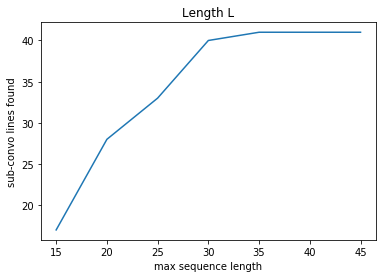

In [81]:
plt.plot(g1_x, g1_y)
plt.xlabel("max sequence length")
plt.ylabel("sub-convo lines found")
plt.title("Length L")

In [82]:
g1_x = [x*0.1 for x in range(1,6)]
g1_y = []
for i in range(1,6):
    sc = find_sub_conversations(test1, labels, 0.1*i, 30)
    val = 0
    for key in list(sc.keys()):
        val += sc[key]
    g1_y.append(val)

Text(0.5, 1.0, 'c value')

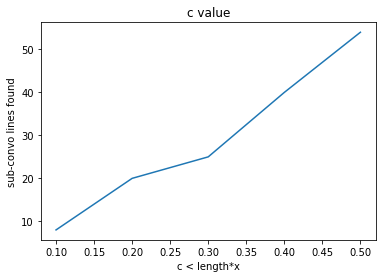

In [83]:
plt.plot(g1_x, g1_y)
plt.xlabel("c < length*x")
plt.ylabel("sub-convo lines found")
plt.title("c value")

# NOTE: since we don't really have a basis for comparison, these linear relationships obviously make sense, we don't really compare any factor of "quality" for the lines found, just that we find more if we are less strict

# NOTE: we can probably redo these graphs with a better sense of what the values are offering if we correlate to the similarity measure in some way (i.e: how do we compare quality of scores in a freq-based analysis?

# NOTE: in our case, we want trace1 and trace2 to have more similarity, compared to trace3, which should be less similar